<a href="https://colab.research.google.com/github/tjdux/ML/blob/main/05_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## k-최근접 이웃의 한계

In [120]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [121]:
from sklearn.model_selection import train_test_split

# 훈련 세트, 테스트 세트 나누기
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 훈련 세트, 테스트 세트 2차원 배열로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [122]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [123]:
p1 = knr.predict([[50]])
p1

array([1033.33333333])

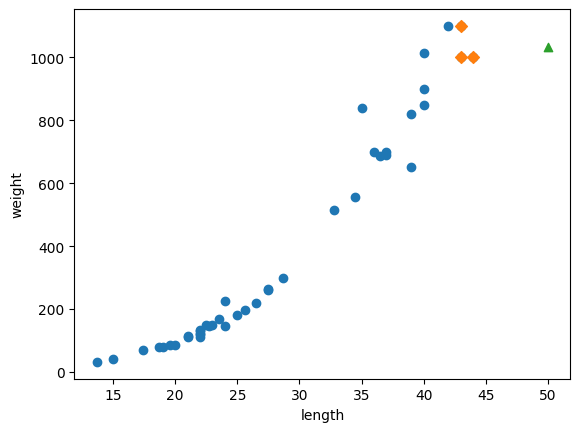

In [124]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(50, p1, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [125]:
# k-최근접 이웃 알고리즘은 이웃 샘플의 타깃 값의 평균을 반환
p1 == np.mean(train_target[indexes])

array([ True])

- k-최근접 이웃 회귀는 가장 가까운 샘플을 찾아 타깃을 평균
- ➡️ 새로운 샘플이 훈련 세트의 범위를 벗어나면 엉뚱한 값을 예측

In [126]:
p2 = knr.predict([[100]])

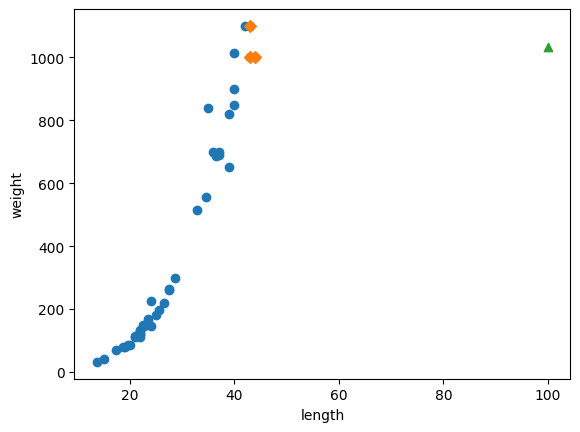

In [127]:
distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(100, p2, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [128]:
p2 == np.mean(train_target[indexes])

array([ True])

In [129]:
# 길이가 50일 때와 100일 때 예측값이 동일
p1 == p2

array([ True])

⚠️ 머신러닝 모델은 주기적으로 훈련해야 함: 시간과 환경이 변화하면서 데이터도 바뀌기 때문에

## 선형 회귀
- 특성이 하나인 경우 특성을 가장 잘 나타낼 수 있는 직선을 학습하는 알고리즘
- 비교적 간단하고 뛰어난 성능


In [130]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)

p = lr.predict([[50]])
print(p)

[1241.83860323]


$$y = ax + b$$
- $a$: coefficient
- $b$: intercept

In [131]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


- 모델 파라미터 (model parameter): 머신러닝 알고리즘이 찾은 값 (e.g. coef_, intercept_)
- 모델 기반 학습: 최적의 모델 파라미터를 찾는 과정
- 사례 기반 학습: 모델 파라미터를 찾지 않고 훈련 세트를 저장하는 것이 훈련의 전부


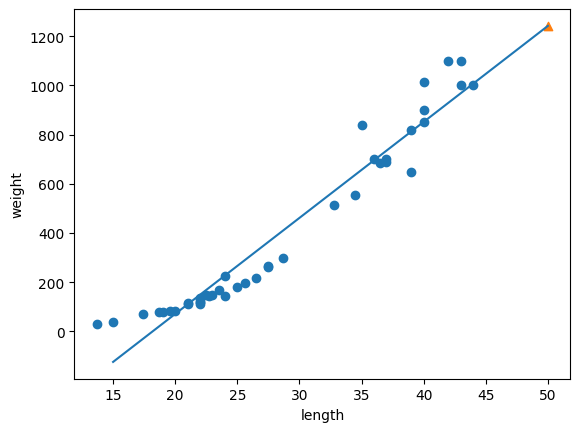

In [132]:
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프
[coef, intercept] = [lr.coef_, lr.intercept_]
plt.plot([15, 50], [15*coef + intercept, 50*coef + intercept])

# 50cm 농어 데이터
plt.scatter(50, p, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [133]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


- 문제점
  - 훈련 세트의 점수가 높지 않음. 전체적으로 과소적합
  - 선형 회귀 직선대로 예측하면 무게가 0g 밑으로 내려감

## 다항 회귀
- 두 번째 문제를 해결하기 위해 2차 방정식 그리기
- 2차 방정식의 그래프를 그리려면 길이를 제곱한 항이 훈련 세트에 추가되어야 함

In [134]:
# 길이를 제곱한 항 추가
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


⚠️ 타깃값은 그대로 사용

In [135]:
lr = LinearRegression()

lr.fit(train_poly, train_target)

lr.predict([[50**2, 50]])

array([1573.98423528])

In [136]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


$$무게 = 1.01 × 길이^2 - 21.6 \times 길이 + 116.05$$

- 다항 회귀 (polynomial regression): 다항식을 사용한 선형 회귀

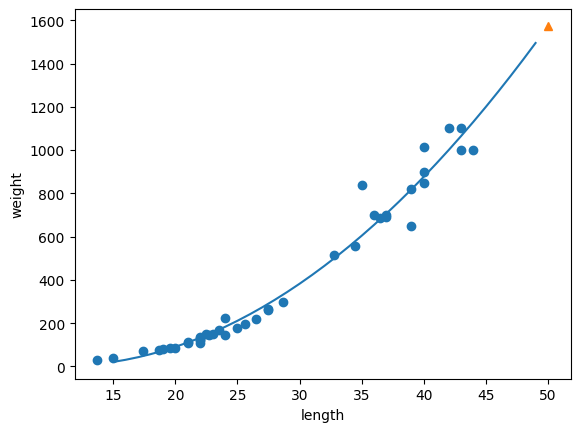

In [137]:
plt.scatter(train_input, train_target)

# 15 ~ 49 2차 방정식 그래프
point = np.arange(15, 50)
[coef, intercept] = [lr.coef_, lr.intercept_]
plt.plot(point, coef[0] * point**2 + coef[1] * point + intercept)

# 50cm 농어 데이터
plt.plot(50, lr.predict([[50**2, 50]]), marker="^")
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [138]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


아직 과소적합의 문제가 남아 있음